# Importation

In [27]:
import os
import pandas as pd

# Chemin absolu du dossier courant
chemin_scouting = os.path.abspath('..')

print("Chemin du dossier parent :", chemin_scouting)

chemin_data = chemin_scouting + "/datas/matches/equipes/GW/lol_df_Badlulu00.pkl"

data_lol = pd.read_pickle(chemin_data) # dataset

print(f"Le dataset a une taille de : {data_lol.shape}")

pd.set_option('display.max_columns', 163)
pd.set_option('display.max_rows', 5)

data_lol.head()

Chemin du dossier parent : /Users/atysp/Desktop/Avisia/projet_lol/scouting
Le dataset a une taille de : (100, 75)


,matchId,participants,platformId,queueId,gameDuration,gameVersion,mapId,puuid,summonerName,teamId,win,individualPosition,championName,champExperience,kills,assists,deaths,kda,killParticipation,damagePerMinute,totalMinionsKilled,neutralMinionsKilled,goldPerMinute,goldDiffAt10,goldDiffAt15,expDiffAt10,expDiffAt15,csDiffAt10,csDiffAt15,soloKills,totalTimeCCDealt,timeCCingOthers,enemyChampionImmobilizations,teamDamagePercentage,damageTakenOnTeamPercentage,totalHeal,totalDamageDealtToChampions,visionScorePerMinute,wardsPlaced,controlWardsPlaced,stealthWardsPlaced,wardsGuarded,wardTakedowns,dragonTakedowns,baronTakedowns,riftHeraldTakedowns,turretTakedowns,inhibitorTakedowns,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,firstTowerAssist,firstTowerKill,teamElderDragonKills,turretPlatesTaken,onMyWayPings,enemyMissingPings,allInPings,assistMePings,baitPings,basicPings,commandPings,dangerPings,getBackPings,holdPings,needVisionPings,pushPings,visionClearedPings,enemyVisionPings,ennemyTeamKills,ennemyTeamDeaths,ennemyTeamGolds,ennemyTeamWardPlaced,ennemyTeamTotalLvl,ennemyTeamDamages
0,EUW1_6528747599,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,EUW1,420,1468,13.14.522.7601,11,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,Badlulu00,100,True,TOP,Yone,17684,16,8,1,24.0,0.727273,1368.829418,234,16,699.643589,1513,None,1233,None,30,None,4,474,27,42,0.410498,0.220415,8139,33500,0.880055,10,3,7,0,0,0,1,1,7,1,7043,20898,7043,False,True,0,5,29,7,1,8,1,0,5,0,1,0,0,0,0,0,21,34,46214,46,49608,67784
1,EUW1_6528700594,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,EUW1,420,1486,13.14.522.7601,11,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,Badlulu00,100,True,TOP,Aatrox,14535,7,11,4,4.5,0.6,935.858773,181,18,502.886365,268,None,-399,None,1,None,0,248,24,50,0.264982,0.2596,10945,23192,0.981639,9,3,6,0,4,0,0,0,3,1,2142,4349,2142,False,True,0,5,30,5,0,6,0,0,2,0,0,0,0,1,0,0,21,30,47146,59,48728,61040
2,EUW1_6528367649,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,EUW1,420,1682,13.14.522.7601,11,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,Badlulu00,100,True,TOP,KSante,16827,5,14,3,6.333333,0.527778,631.835335,216,8,475.886709,-322,None,-51,None,3,None,3,2712,35,60,0.22737,0.319925,11733,17719,0.922745,8,2,6,0,3,0,0,0,3,0,3742,3742,3742,False,True,0,4,32,12,3,7,0,0,9,0,1,0,0,0,0,0,18,36,52291,66,56148,85904
3,EUW1_6528262584,ihr-O8AKXy2wTpa_RDzcTkGnd7qWyCuDzahwVlPpEw7iew...,EUW1,420,1479,13.14.522.7601,11,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,Badlulu00,200,True,TOP,Yone,15043,6,6,2,6.0,0.521739,1196.895863,212,11,517.41963,1055,None,884,None,21,None,4,214,26,30,0.372183,0.179636,3615,29652,0.819304,10,2,8,0,1,0,0,1,2,0,4394,6675,4394,False,False,0,4,19,9,0,1,0,0,6,0,1,0,0,0,0,0,14,23,42145,75,47502,64947
4,EUW1_6527754806,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,EUW1,420,1626,13.14.522.7601,11,KJLobfhi20s2V45keoOTQpX8CSmNGx15o6iM27wV2xUTk0...,Badlulu00,100,True,TOP,KSante,16547,5,15,3,6.666667,0.465116,574.985457,202,0,448.021475,103,None,752,None,11,None,0,1240,38,68,0.146448,0.219118,5290,15592,0.610796,10,3,7,0,0,0,1,0,3,0,4345,6634,4345,False,False,0,1,15,10,1,6,0,0,10,0,0,2,0,0,0,0,17,43,49701,53,56063,72073


In [28]:
data_lol.dtypes

matchId               string
participants          string
                       ...  
ennemyTeamTotalLvl     Int64
ennemyTeamDamages      Int64
Length: 75, dtype: object

# RADAR PLOT

## Performances individuelles (Individual Performance)

Cette méta-variable peut être évaluée en utilisant des statistiques sur les performances pendant la phase de lane regroupant le gain de gold et d’expérience.

Chemin du dossier parent : /Users/atysp/Desktop/Avisia/projet_lol/scouting


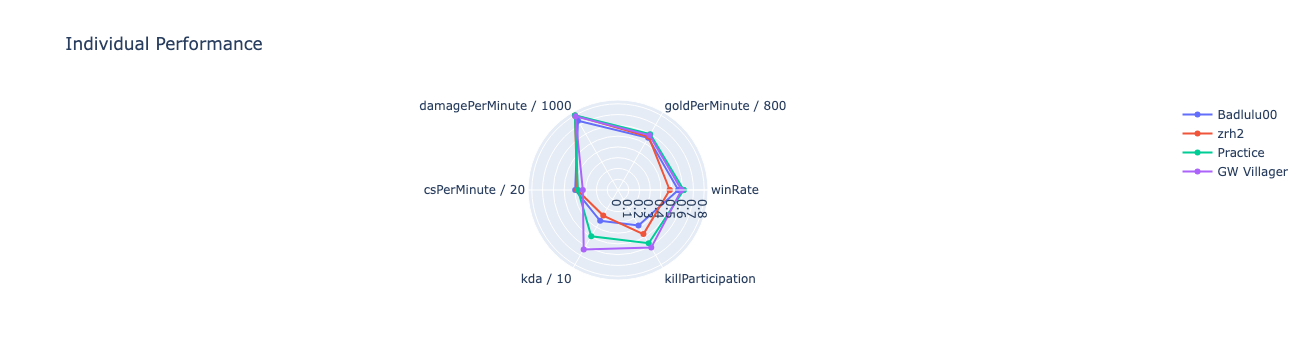

In [29]:
import pandas as pd
import plotly.graph_objects as go

def calculate_means(df):
    df = df[df["gameDuration"] > 0]
    winRate = df["win"].mean()
    goldPerMinute = df["goldPerMinute"].mean()
    damagePerMinute = df["damagePerMinute"].mean()
    csPerMinute = ((df["neutralMinionsKilled"] + df["totalMinionsKilled"]) / df["gameDuration"] * 60).mean()
    kda = df["kda"].mean()
    killParticipation = df["killParticipation"].mean()
    return [winRate, goldPerMinute / 800 , damagePerMinute / 1000, csPerMinute / 20 , kda / 10, killParticipation]

import os

# Chemin absolu du dossier courant
chemin_scouting = os.path.abspath('..')

print("Chemin du dossier parent :", chemin_scouting)

chemin_data_1 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_Badlulu00.pkl"
data_lol_1 = pd.read_pickle(chemin_data_1)
summoner_name_1 = data_lol_1["summonerName"][0]
data_lol_1 = data_lol_1[["win", "goldPerMinute", "damagePerMinute", "neutralMinionsKilled","totalMinionsKilled", "gameDuration", "kda", "killParticipation"]]
data_1 = calculate_means(data_lol_1)
data_1.append(data_1[0])

chemin_data_2 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_zrh2.pkl"
data_lol_2 = pd.read_pickle(chemin_data_2)
summoner_name_2 = data_lol_2["summonerName"][0]
data_lol_2 = data_lol_2[["win", "goldPerMinute", "damagePerMinute", "neutralMinionsKilled","totalMinionsKilled", "gameDuration", "kda", "killParticipation"]]
data_2 = calculate_means(data_lol_2)
data_2.append(data_2[0])

chemin_data_3 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_Practice.pkl"
data_lol_3 = pd.read_pickle(chemin_data_3)
summoner_name_3 = data_lol_3["summonerName"][0]
data_lol_3 = data_lol_3[["win", "goldPerMinute", "damagePerMinute", "neutralMinionsKilled","totalMinionsKilled", "gameDuration", "kda", "killParticipation"]]
data_3 = calculate_means(data_lol_3)
data_3.append(data_3[0])

# Ajouter les nouveaux dataframes
chemin_data_4 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_GW Villager.pkl"
data_lol_4 = pd.read_pickle(chemin_data_4)
summoner_name_4 = data_lol_4["summonerName"][0]
data_lol_4 = data_lol_4[["win", "goldPerMinute", "damagePerMinute", "neutralMinionsKilled","totalMinionsKilled", "gameDuration", "kda", "killParticipation"]]
data_4 = calculate_means(data_lol_4)
data_4.append(data_4[0])

chemin_data_5 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_ayekasia.pkl"
data_lol_5 = pd.read_pickle(chemin_data_5)
summoner_name_5 = data_lol_5["summonerName"][0]
data_lol_5 = data_lol_5[["win", "goldPerMinute", "damagePerMinute", "neutralMinionsKilled","totalMinionsKilled", "gameDuration", "kda", "killParticipation"]]
data_5 = calculate_means(data_lol_5)
data_5.append(data_5[0])


categories = ['winRate', 'goldPerMinute / 800 ', 'damagePerMinute / 1000', 'csPerMinute / 20', 'kda / 10', 'killParticipation']
categories.append(categories[0])


fig = go.Figure(
    data=[
        go.Scatterpolar(r=data_1, theta=categories, name=summoner_name_1),
        go.Scatterpolar(r=data_2, theta=categories, name=summoner_name_2),
        go.Scatterpolar(r=data_3, theta=categories, name=summoner_name_3),
        go.Scatterpolar(r=data_4, theta=categories, name=summoner_name_4),  # Nouveau dataframe
        ],
    layout=go.Layout(
        title=go.layout.Title(text='Individual Performance'),
        showlegend=True
    )
)

fig.show()

## Vision et contrôle de la carte (Map Awareness)

Cette méta-variable peut être évaluée en utilisant des statistiques telles que le nombre de contrôleurs de vision placés, le nombre d'ennemis détectés par des contrôleurs de vision, le temps passé à la base pour acheter des objets, etc. Ces statistiques révèlent la capacité du joueur à comprendre et à contrôler la carte du jeu.

On pourrait simplement se baser sur le score de vision par minute pour cette caractéristique. 

0     2.527301
1    32.690000
       ...    
6     2.527301
7     2.527301
Length: 8, dtype: float64


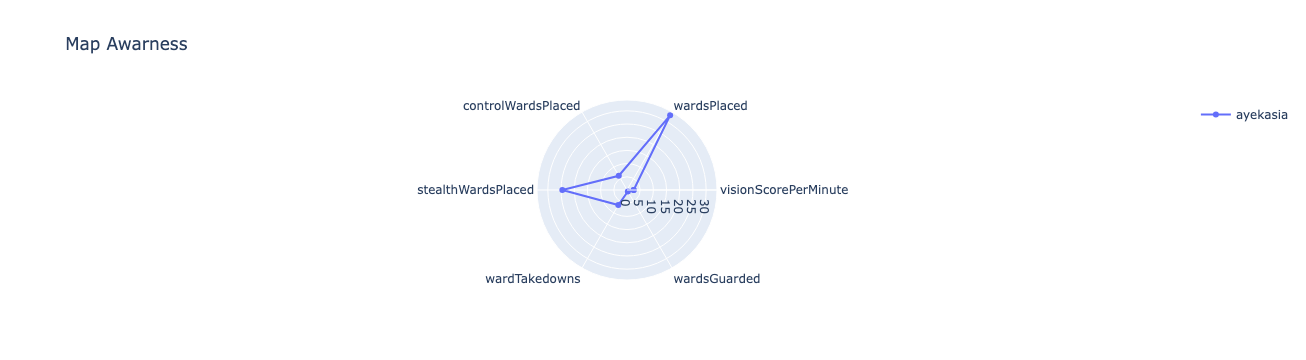

In [30]:
import pandas as pd
import plotly.graph_objects as go

columns = ["visionScorePerMinute" , "wardsPlaced", "controlWardsPlaced", "stealthWardsPlaced", "wardTakedowns", "wardsGuarded", "visionScorePerMinute"]

# categories = [Vision score Per Minute, Ward Per Minute, Vision Ward Per Minute, Ward Cleared Per Minute]
# visionScore                        object
# visionScorePerMinute              float64
# wardsPlaced                        object
# controlWardsPlaced                 object
# stealthWardsPlaced                 object
# wardTakedowns                      object
# wardsKilled                        object
# wardsGuarded                       object

chemin_data_5 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_ayekasia.pkl"
data_lol_5 = pd.read_pickle(chemin_data_5)
summoner_name_5 = data_lol_5["summonerName"][0]


data_lol = data_lol_5
summoner_name = summoner_name_5
data_lol = data_lol[data_lol["gameDuration"]>0]
data = data_lol[columns].mean()

first_row = data.iloc[[0]]
data = pd.concat([data, first_row], ignore_index=True)

print(data)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=data, theta=columns, name=summoner_name),
        ],
    layout=go.Layout(
        title=go.layout.Title(text='Map Awarness'),
        showlegend=True
    )
)

fig.show()

## Objectif et stratégie (Objective and Strategy)

Cette méta-variable peut être évaluée en utilisant des statistiques telles que le taux de participation aux objectifs (tours, dragons,barons, etc). Ces statistiques montrent la capacité du joueur à prendre des décisions stratégiques et à coordonner son équipe.

On pourrait aussi rajouter le nombre de plaques éliminées ou le pourcentage de dommage infligé aux tours qui serait plus représentatif des compétences individuelles plutôt que collectives.

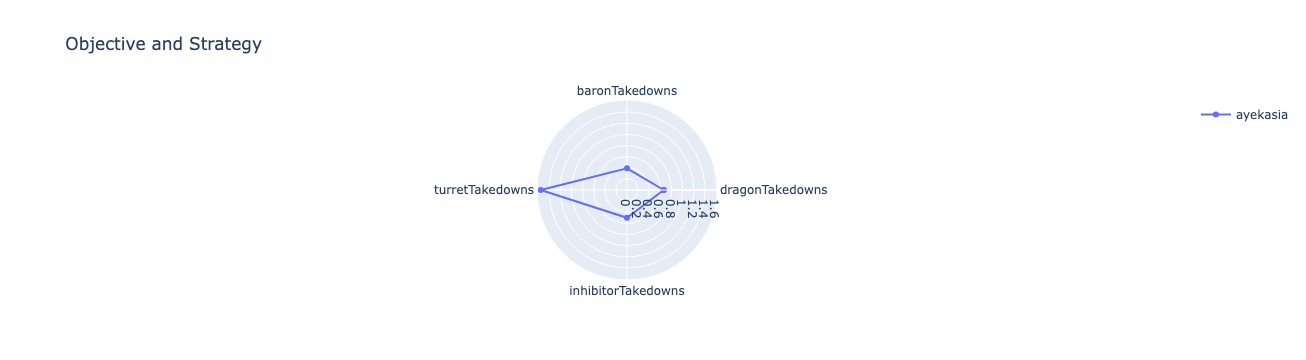

In [31]:
import pandas as pd
import plotly.graph_objects as go

# - drake / herald / barron
# - turret / inhibitor / nexus
# 2 branches avec tourelles plates inib et baron drake etc
# dragonKills
# baronKills
# turretKills
# inhibitorKills

# dragonTakedowns                    object
# baronTakedowns                     object
# firstTowerAssist                   object
# firstTowerKill                     object
# turretKills                        object
# turretTakedowns                    object
# turretsLost                        object
# inhibitorKills                     object
# inhibitorTakedowns                 object
# inhibitorsLost                     object
# nexusKills                         object
# nexusLost                          object

# dragonTakedowns                    
# baronTakedowns 
# inhibitorTakedowns   
# turretTakedowns 
# heraldTakedowns ???????
# plates ??


columns = ["dragonTakedowns" , "baronTakedowns", "turretTakedowns", "inhibitorTakedowns"]
columns.append(columns[0])


chemin_data_5 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_ayekasia.pkl"
data_lol_5 = pd.read_pickle(chemin_data_5)
summoner_name_5 = data_lol_5["summonerName"][0]
data_lol = data_lol_5
summoner_name = summoner_name_5


data_lol = data_lol[data_lol["gameDuration"]>0]
data = data_lol[columns].mean()

first_row = data.iloc[[0]]
data = pd.concat([data, first_row], ignore_index=True)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=data, theta=columns, name=summoner_name),
        ],
    layout=go.Layout(
        title=go.layout.Title(text='Objective and Strategy'),
        showlegend=True
    )
)

fig.show()

## Adaptabilité (Adaptability)

Cette méta-variable peut être évaluée en utilisant des statistiques telles que la diversité des champions joués ainsi que le taux de victoire avec différents champions, etc. Ces statistiques indiquent la capacité du joueur à s'adapter à différentes situations de jeu.

On pourrait regarder le pourcentage de champions ayant un winrate > 50% parmi les champions joués les x derniers matchs.
On pourrait aussi regarder le nombre de champions joués les x dernières semaines. 

In [32]:
import pandas as pd

chemin_data_1 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_zrh2.pkl"
data_lol_1 = pd.read_pickle(chemin_data_1)
summoner_name_1 = data_lol_1["summonerName"][0]
mean_win_rate_by_champion_1 = data_lol_1.groupby("championName")["win"].mean()
mean_win_rate_by_champion_1

chemin_data_2 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_ayekasia.pkl"
data_lol_2 = pd.read_pickle(chemin_data_2)
summoner_name_2 = data_lol_2["summonerName"][0]
mean_win_rate_by_champion_2 = data_lol_2.groupby("championName")["win"].mean()
mean_win_rate_by_champion_2

# Merge the two datasets on the "championName" column
merged_data = pd.merge(mean_win_rate_by_champion_1, mean_win_rate_by_champion_2, on="championName", suffixes=('_'+summoner_name_1, '_'+summoner_name_2))

# Display the comparative table
print(merged_data)

              win_zrh2  win_ayekasia
championName                        
Nautilus           0.0           0.6


## Communication et coopération (Communication and Cooperation)

Cette méta-variable peut être plus difficile à évaluer uniquement à partir des statistiques disponibles. Cependant, on peut évaluer cette compétence en se basant sur des critères tels que le taux de ping sur la carte. Ces statistiques peuvent donner une idée de la communication et de la coopération du joueur. 

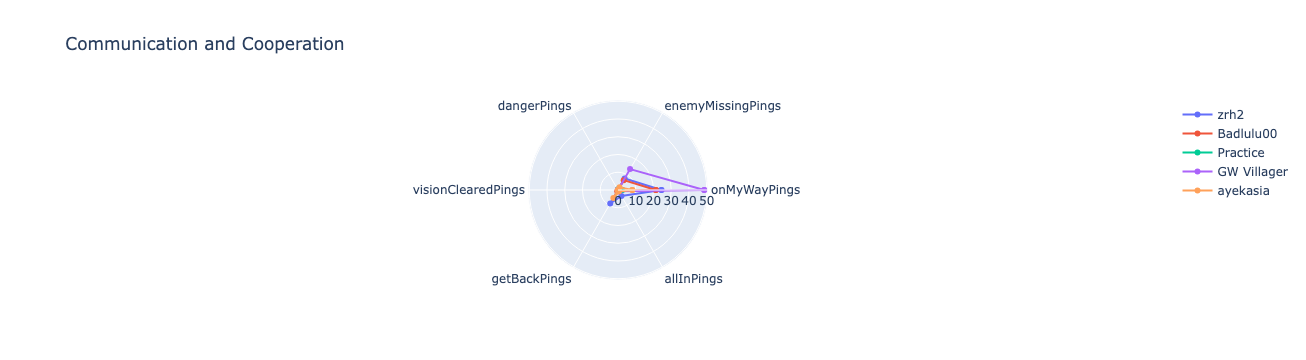

In [33]:
columns = ["onMyWayPings", "enemyMissingPings", "dangerPings", "visionClearedPings", "getBackPings", "allInPings"]
columns.append(columns[0])

# allInPings	assistMePings	baitPings	basicPings	commandPings	dangerPings	getBackPings
# holdPings	needVisionPings	pushPings	visionClearedPings	onMyWayPings	enemyMissingPings	enemyVisionPings

def calculate_means(df, columns):
    df = df[df["gameDuration"] > 0]
    return df[columns].mean()

# Load the dataframes and calculate the mean values for each
chemin_data_1 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_zrh2.pkl"
data_lol_1 = pd.read_pickle(chemin_data_1)
summoner_name_1 = data_lol_1["summonerName"][0]
data_1 = calculate_means(data_lol_1, columns)
first_row = data_1.iloc[[0]]
data_1 = pd.concat([data_1, first_row], ignore_index=True)

chemin_data_2 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_Badlulu00.pkl"
data_lol_2 = pd.read_pickle(chemin_data_2)
summoner_name_2 = data_lol_2["summonerName"][0]
data_2 = calculate_means(data_lol_2, columns)
first_row = data_2.iloc[[0]]
data_2 = pd.concat([data_2, first_row], ignore_index=True)

chemin_data_3 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_Practice.pkl"
data_lol_3 = pd.read_pickle(chemin_data_3)
summoner_name_3 = data_lol_3["summonerName"][0]
data_3 = calculate_means(data_lol_3, columns)
first_row = data_3.iloc[[0]]
data_3 = pd.concat([data_3, first_row], ignore_index=True)

chemin_data_4 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_GW Villager.pkl"
data_lol_4 = pd.read_pickle(chemin_data_4)
summoner_name_4 = data_lol_4["summonerName"][0]
data_4 = calculate_means(data_lol_4, columns)
first_row = data_4.iloc[[0]]
data_4 = pd.concat([data_4, first_row], ignore_index=True)


chemin_data_5 = chemin_scouting + "/datas/matches/equipes/GW/lol_df_ayekasia.pkl"
data_lol_5 = pd.read_pickle(chemin_data_5)
summoner_name_5 = data_lol_5["summonerName"][0]
data_5 = calculate_means(data_lol_5, columns)
first_row = data_5.iloc[[0]]
data_5 = pd.concat([data_5, first_row], ignore_index=True)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=data_1, theta=columns, name=summoner_name_1),
        go.Scatterpolar(r=data_2, theta=columns, name=summoner_name_2),
        go.Scatterpolar(r=data_3, theta=columns, name=summoner_name_3),
        go.Scatterpolar(r=data_4, theta=columns, name=summoner_name_4),
        go.Scatterpolar(r=data_5, theta=columns, name=summoner_name_5),
        ],
    layout=go.Layout(
        title=go.layout.Title(text='Communication and Cooperation'),
        showlegend=True
    )
)

fig.show()